In [10]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')

import numpy as np
import pandas as pd
import statsmodels.api as sm

## Linear Regression with R datasets
We can access these datasets in python using the `statsmodels` package. Here the `espgh` dataset is used.
### The data is from a case-control study of (o)esophageal cancer in Ille-et-Vilaine, France.
___

In [151]:
esoph = sm.datasets.get_rdataset('esoph')
esoph

<class 'statsmodels.datasets.utils.Dataset'>

We need to clean it up a bit. This is why we need the dictionaries in the cell below.

In [76]:
# Making dictionaries to use as key lookups

# Age groups
agegp = {1: '25-34', 2: '35-44', 3: '45-54', 4: '55-64', 5: '65-74', 6: '75+'}
agegp_inv = {v: k for v, k in zip(agegp.values(), agegp.keys())}

# Alcohol consumption in g/day
alcgp = {1: '0-39', 2: '40-79', 3: '80-119', 4: '120+'}
alcgp_inv = {v: k for v, k in zip(alcgp.values(), alcgp.keys())}

# Tobacco consumption in g/day
tobgp = {1: '0-9', 2: '10-19', 3: '20-29', 4: '30+'}
tobgp_inv = {v: k for v, k in zip(tobgp.values(), tobgp.keys())}

In [152]:
df = esoph.data
# Rename a column
df.columns = ['Age_group']+list(df.columns[1:])
df

,Age_group,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
5,25-34,40-79,10-19,0,7
6,25-34,40-79,20-29,0,4
7,25-34,40-79,30+,0,7
8,25-34,80-119,0-9g/day,0,2
9,25-34,80-119,10-19,0,1


In [67]:
print(agegp)
print(agegp_inv)

{1: '25-34', 2: '35-44', 3: '45-54', 4: '55-64', 5: '65-74', 6: '75+'}
{'25-34': 1, '55-64': 4, '65-74': 5, '35-44': 2, '75+': 6, '45-54': 3}


Add features ...

In [153]:
df['positive_frac'] = df.ncases/df.ncontrols

Clean a little bit more ...

In [156]:
df['alcgp'] = list(map(lambda age: age.split('g')[0], df['alcgp']))
df['tobgp'] = list(map(lambda age: age.split('g')[0], df['tobgp']))
df.head()

,Age_group,alcgp,tobgp,ncases,ncontrols,positive_frac,Age_group_i
0,25-34,0-39,0-9,0,40,0,1
1,25-34,0-39,10-19,0,10,0,1
2,25-34,0-39,20-29,0,6,0,1
3,25-34,0-39,30+,0,5,0,1
4,25-34,40-79,0-9,0,27,0,1


In [157]:
df['Age_group_i'] = list(map(lambda key: agegp_inv[key], df['Age_group']))
df['alcgp'] = list(map(lambda key: alcgp_inv[key], df['alcgp']))
df['tobgp'] = list(map(lambda key: tobgp_inv[key], df['tobgp']))
df.head()

,Age_group,alcgp,tobgp,ncases,ncontrols,positive_frac,Age_group_i
0,25-34,1,1,0,40,0,1
1,25-34,1,2,0,10,0,1
2,25-34,1,3,0,6,0,1
3,25-34,1,4,0,5,0,1
4,25-34,2,1,0,27,0,1


In [71]:
df.dtypes

agegp             object
alcgp             object
tobgp             object
ncases             int64
ncontrols          int64
positive_frac    float64
dtype: object

Okay great. Now we can get pandas to do some work for us.

In [83]:
df.describe()

,agegp,alcgp,tobgp,ncases,ncontrols,positive_frac
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,3.386364,2.454545,2.409091,2.272727,11.079545,0.346807
std,1.650021,1.123511,1.120718,2.753169,12.722703,0.357342
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,3.000000,0.000000
50%,3.000000,2.000000,2.000000,1.000000,6.000000,0.267857
75%,5.000000,3.000000,3.000000,4.000000,14.000000,0.583333
max,6.000000,4.000000,4.000000,17.000000,60.000000,1.000000


What I notice is that ~30% of the group, on average, were diagnosed positive for the disease. That being said, the sample size was small and the standard deviation ends up being quite large.

In [86]:
df.dtypes

agegp              int64
alcgp              int64
tobgp              int64
ncases             int64
ncontrols          int64
positive_frac    float64
dtype: object

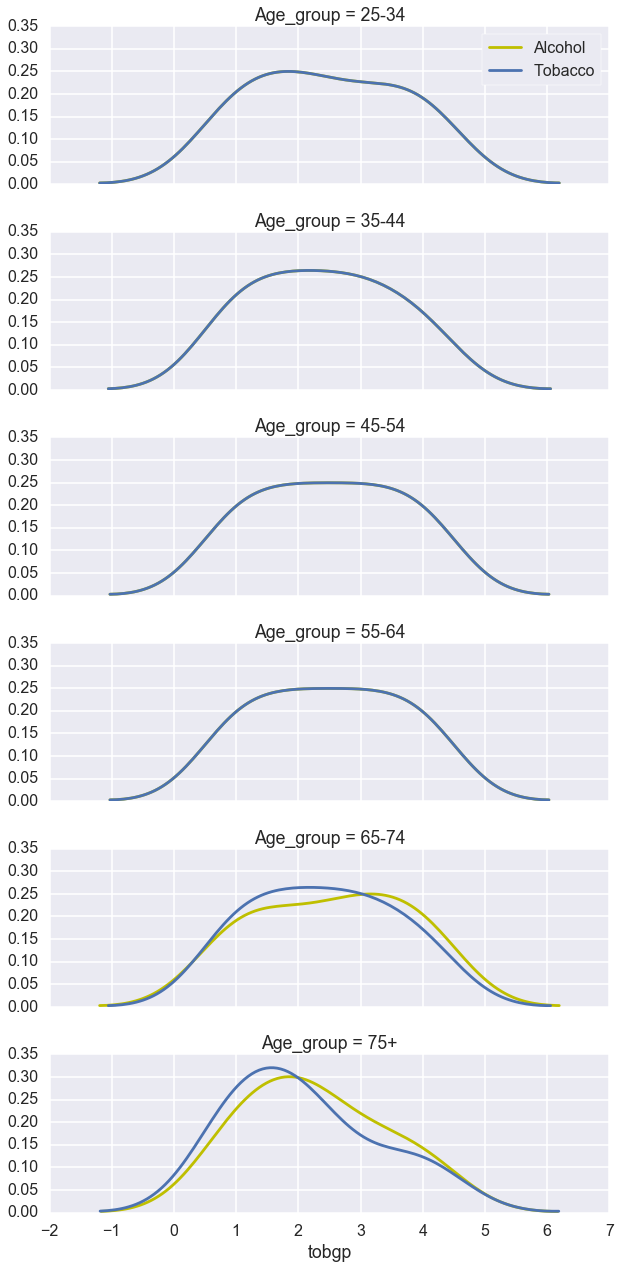

In [160]:
g = sns.FacetGrid(df, row="Age_group", #row_order=ordered_days,
                  size=3, aspect=3, legend_out=False)
g.map(sns.distplot, "alcgp", hist=False, rug=False, color='y', label='Alcohol', axlabel='Consumption group');
g.map(sns.distplot, "tobgp", hist=False, rug=False, label='Tobacco', axlabel='Consumption group');
g.add_legend(frameon=True)

#### Is there a correlation to the age?

In [175]:
agegp_inv

{'25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65-74': 5, '75+': 6}

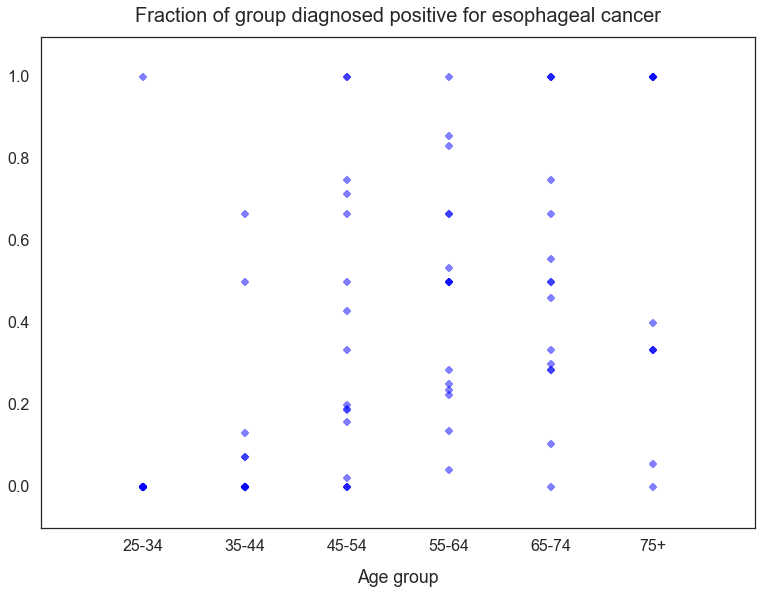

In [192]:
sns.set_style('white')
plt.scatter(list(df.Age_group_i), list(df.positive_frac),
            alpha=0.5, linewidths=5, marker='x')
plt.title('Fraction of group diagnosed positive for esophageal cancer',
          fontsize=20, y=1.02)
plt.xlabel('Age group', labelpad=15)
plt.xticks(range(7), ['', '25-34', '35-44', '45-54', '55-64', '65-74', '75+', ''])
plt.ylim(-0.1,1.1)
plt.show()

It looks like there is. We'll include this in the model along with the alcohol and smoking. The line of best fit will look like this:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$$

where $\beta_0$ is the intercept and the other $\beta$'s are the slopes. We have 3 independent variables:
    - age
    - alcohol comsumption
    - tobacco consumption

In [197]:
tobgp_inv

{'0-9': 1, '10-19': 2, '20-29': 3, '30+': 4}

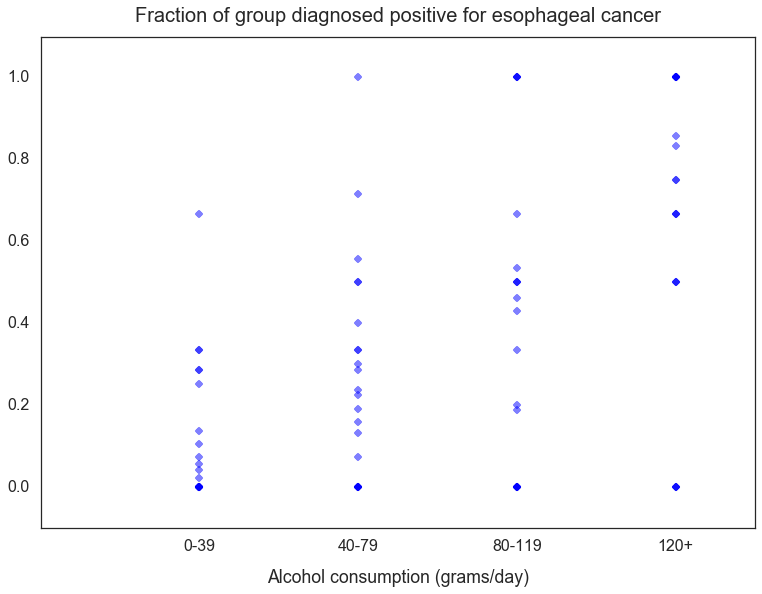

In [196]:
sns.set_style('white')
plt.scatter(list(df.alcgp), list(df.positive_frac),
            alpha=0.5, linewidths=5, marker='x')
plt.title('Fraction of group diagnosed positive for esophageal cancer',
          fontsize=20, y=1.02)
plt.xlabel('Alcohol consumption (grams/day)', labelpad=15)
plt.xticks(range(5), ['', '0-39', '40-79', '80-119', '120+', ''])
plt.ylim(-0.1,1.1)
plt.show()

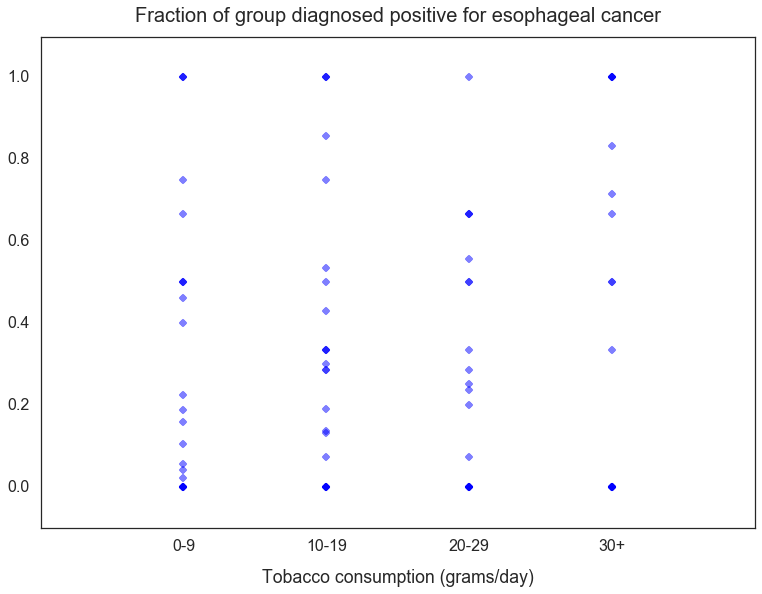

In [198]:
sns.set_style('white')
plt.scatter(list(df.tobgp), list(df.positive_frac),
            alpha=0.5, linewidths=5, marker='x')
plt.title('Fraction of group diagnosed positive for esophageal cancer',
          fontsize=20, y=1.02)
plt.xlabel('Tobacco consumption (grams/day)', labelpad=15)
plt.xticks(range(6), ['', '0-9', '10-19', '20-29', '30+', ''])
plt.ylim(-0.1,1.1)
plt.show()